In [ ]:
# importing required libraries

! pip install geoplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import cartopy.crs as gcrs
import folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.6 MB/s eta 0:00:00


In [ ]:
# import dataset from google drive
housing_data = pd.read_csv('/content/drive/MyDrive/ML datasets/housing.csv')

In [ ]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Total bedrooms column have 207 rows of null values. Those rows were removed.

In [ ]:
housing_data = housing_data.dropna(subset = ['total_bedrooms'])

In [ ]:
housing_data.drop(columns = ['longitude', 'latitude']).describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Summary statistitics for each variable except Longitude and Lattitude were obtained for nulll value removed dataset.

### Univariate Analysis

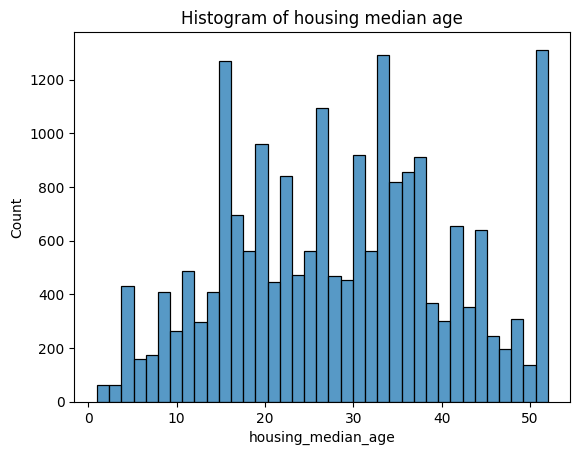

In [ ]:
sns.histplot(data = housing_data, x = 'housing_median_age')
plt.title('Histogram of housing median age')
plt.show()

The distribution of median house age is slightly right-skewed because of the spike at 52 years, reflecting that a notable number of block groups have houses around this age.

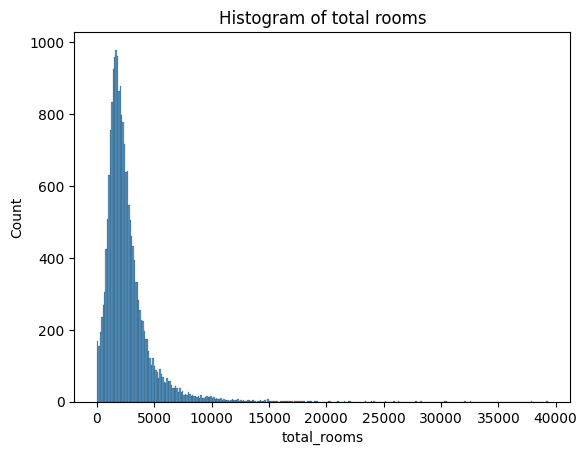

In [ ]:
sns.histplot(data = housing_data, x = 'total_rooms')
plt.title('Histogram of total rooms')
plt.show()

The distribution of total rooms is strongly right-skewed, with a few block groups have exceptionally high total room counts.

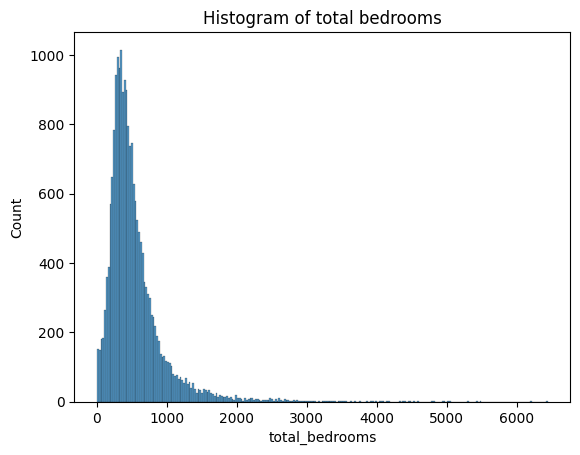

In [ ]:
sns.histplot(data = housing_data, x = 'total_bedrooms')
plt.title('Histogram of total bedrooms')
plt.show()

The distribution of total bedrooms also is strongly right-skewed, due to the few block groups have exceptionally high room counts.

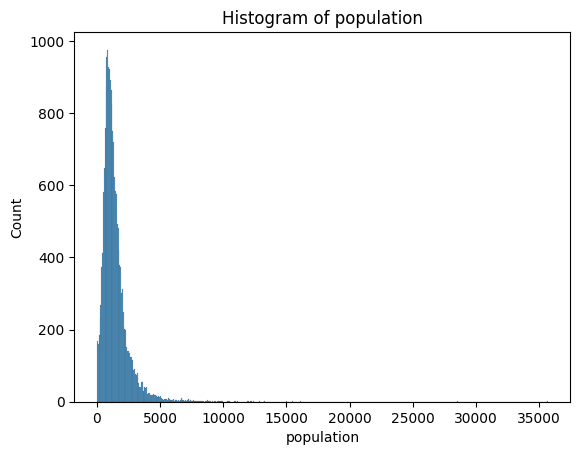

In [ ]:
sns.histplot(data = housing_data, x = 'population')
plt.title('Histogram of population')
plt.show()

The distribution of population is heavily right-skewed, with a small number of block groups have very high populations.

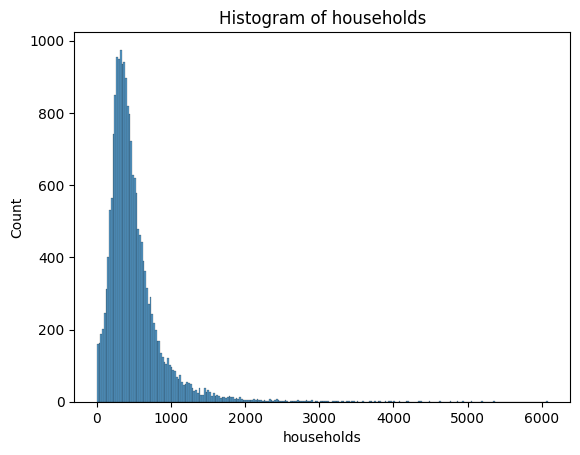

In [ ]:
sns.histplot(data = housing_data, x = 'households')
plt.title('Histogram of households')
plt.show()

The distribution of households is right-skewed. A small number of block groups have very high household counts, appearing as a long tail in the histogram.

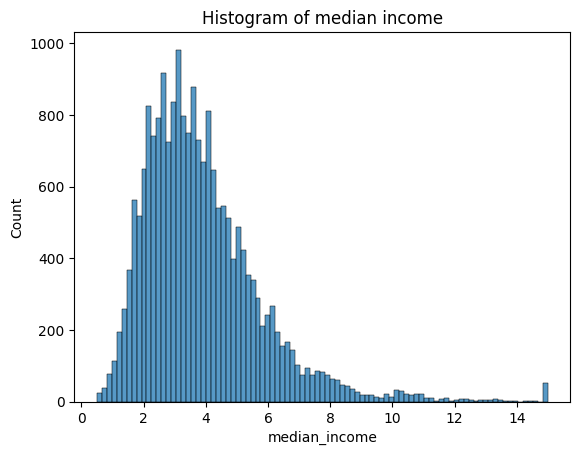

In [ ]:
sns.histplot(data = housing_data, x = 'median_income')
plt.title('Histogram of median income')
plt.show()

The median income has a moderately right-skewed distribution, having a few block groups have very high median incomes, appearing as a long tail in the histogram.

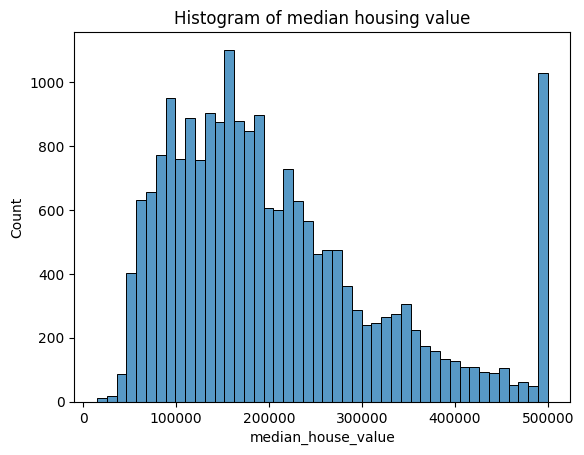

In [ ]:
sns.histplot(data = housing_data, x = 'median_house_value')
plt.title('Histogram of median housing value')
plt.show()

The median house value has a somewhat right-skewed distribution, and the spike at the upper end of the distribution shows that many block groups have houses with the highest values.

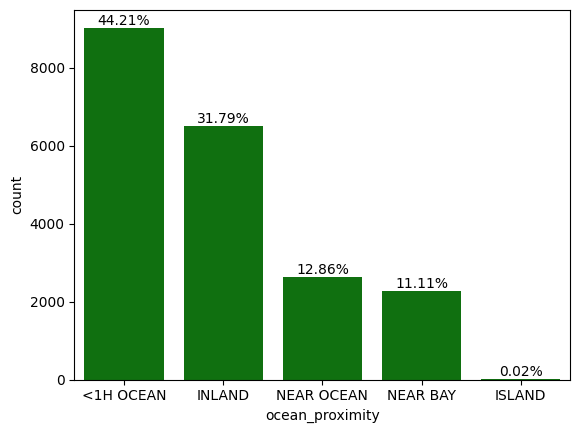

In [ ]:
# Count the number of occurrences of each category in the 'ocean_proximity' column
ocean_proximity_data = pd.DataFrame(housing_data['ocean_proximity'].value_counts())
ocean_proximity_data['percentage'] = (ocean_proximity_data['count'] / ocean_proximity_data['count'].sum() * 100).round(2)

# ploting
ax = sns.barplot(data = ocean_proximity_data, x = 'ocean_proximity', y = 'count', color = 'green')      # named as ax to modify later
ax.bar_label(ax.containers[0], labels = ocean_proximity_data['percentage'].astype(str) + '%', label_type='edge')    # adding percentages above the bar
plt.show()

Most of the houses in the dataset are located within one hour of the ocean, which accounts for 44.21% of all observations. The second largest group (31.79%) consists of houses in inland areas, far from the coast. Smaller portions of houses are located near the ocean (12.86%) and near the bay (11.11%), showing that these coastal-adjacent areas are less common in the data. Only a very tiny proportion (0.02%) of houses are located on islands.

### Bivariate Analysis

Houses closest to the ocean or bay have the highest median values, while inland houses have lower values, showing that housing prices decrease with distance from the coast.

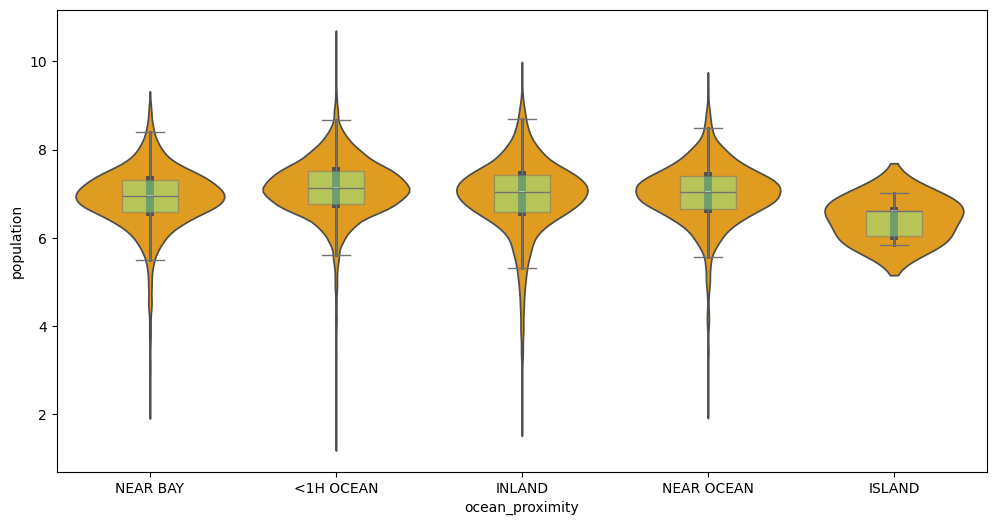

In [ ]:
# distribution of popultion w.r.t the ocean proximity
plt.figure(figsize=(12, 6))
sns.violinplot(y = np.log1p(housing_data['population']), x = 'ocean_proximity', data = housing_data, color = 'orange')
sns.boxplot(y = np.log1p(housing_data['population']), x = 'ocean_proximity', data = housing_data, color = 'lightgreen',
            boxprops = {'facecolor':'lightgreen', 'alpha':0.5}, showfliers = False, width = 0.3)
plt.show()

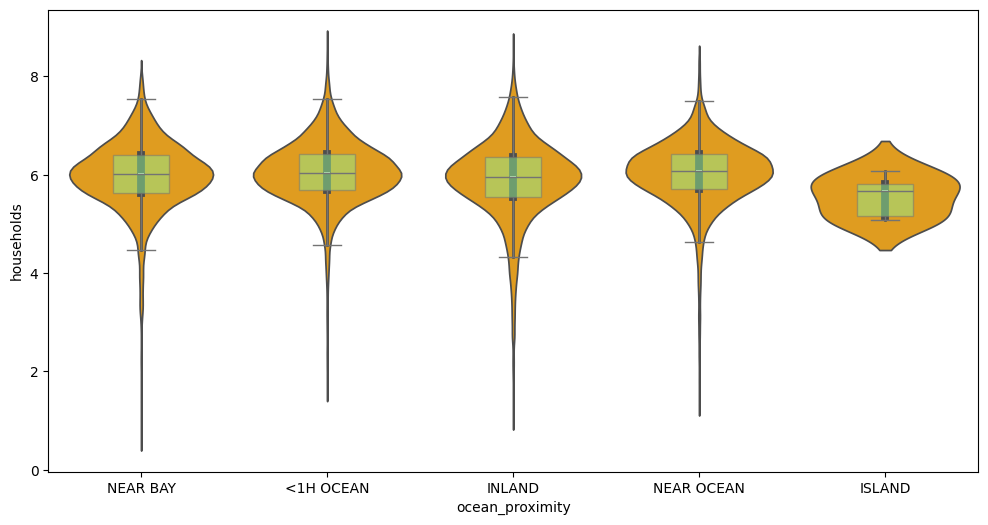

In [ ]:
# distribution of households w.r.t the ocean proximity
plt.figure(figsize=(12, 6))
sns.violinplot(y = np.log1p(housing_data['households']), x = 'ocean_proximity', data = housing_data, color = 'orange')
sns.boxplot(y = np.log1p(housing_data['households']), x = 'ocean_proximity', data = housing_data, color = 'lightgreen',
            boxprops = {'facecolor':'lightgreen', 'alpha':0.5}, showfliers = False, width = 0.3)
plt.show()

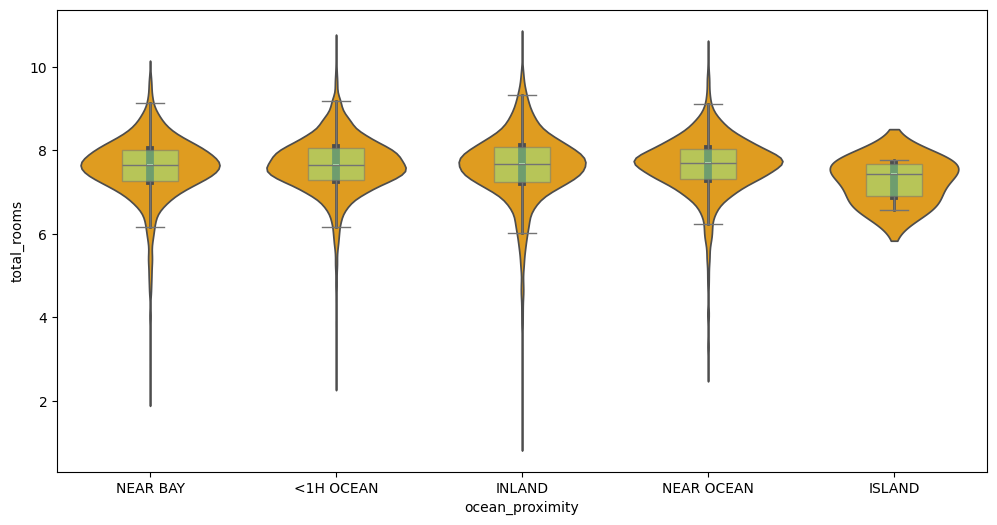

In [ ]:
# distribution of total rooms w.r.t the ocean proximity
plt.figure(figsize=(12, 6))
sns.violinplot(y = np.log1p(housing_data['total_rooms']), x = 'ocean_proximity', data = housing_data, color = 'orange')
sns.boxplot(y = np.log1p(housing_data['total_rooms']), x = 'ocean_proximity', data = housing_data, color = 'lightgreen',
            boxprops = {'facecolor':'lightgreen', 'alpha':0.5}, showfliers = False, width = 0.3)
plt.show()

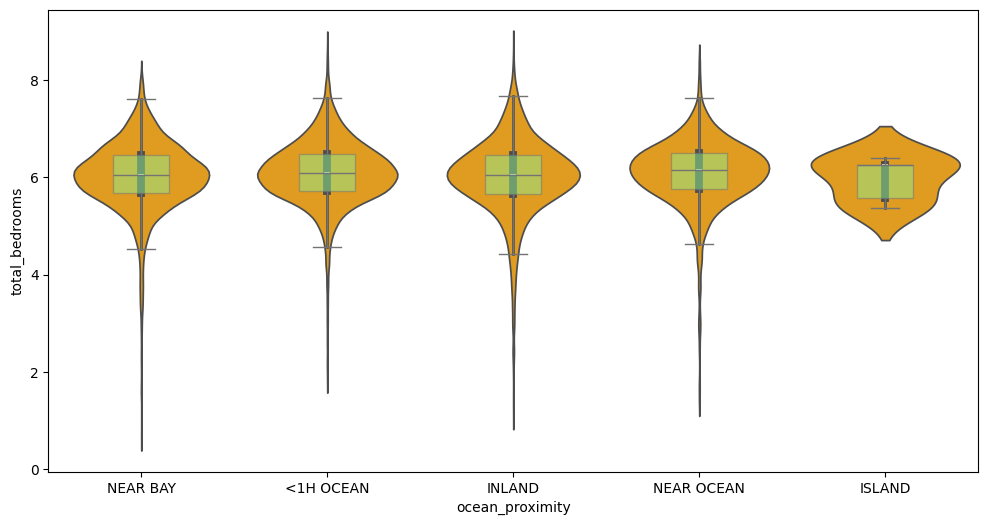

In [ ]:
# distribution of total bedrooms w.r.t the ocean proximity
plt.figure(figsize=(12, 6))
sns.violinplot(y = np.log1p(housing_data['total_bedrooms']), x = 'ocean_proximity', data = housing_data, color = 'orange')
sns.boxplot(y = np.log1p(housing_data['total_bedrooms']), x = 'ocean_proximity', data = housing_data, color = 'lightgreen',
            boxprops = {'facecolor':'lightgreen', 'alpha':0.5}, showfliers = False, width = 0.3)
plt.show()

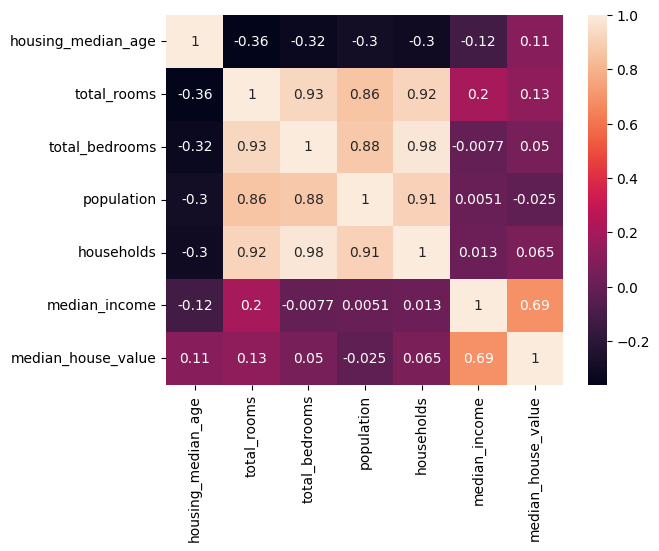

In [ ]:
# heatmap
corr_matrix = housing_data.drop(columns = ['longitude', 'latitude','ocean_proximity']).corr()
sns.heatmap(corr_matrix, annot = True, )
plt.show()

Median income has the strongest positive correlation with median house value (0.69), making it the best predictor of housing prices.

Structural features like total rooms, bedrooms, households, and population are highly correlated with each other, indicating they represent similar size/scale characteristics of an area.

Housing median age shows weak negative correlations with population and room-related variables, suggesting older areas tend to have smaller or less populated homes.

Most variables have very weak relationships with median house value, except income.

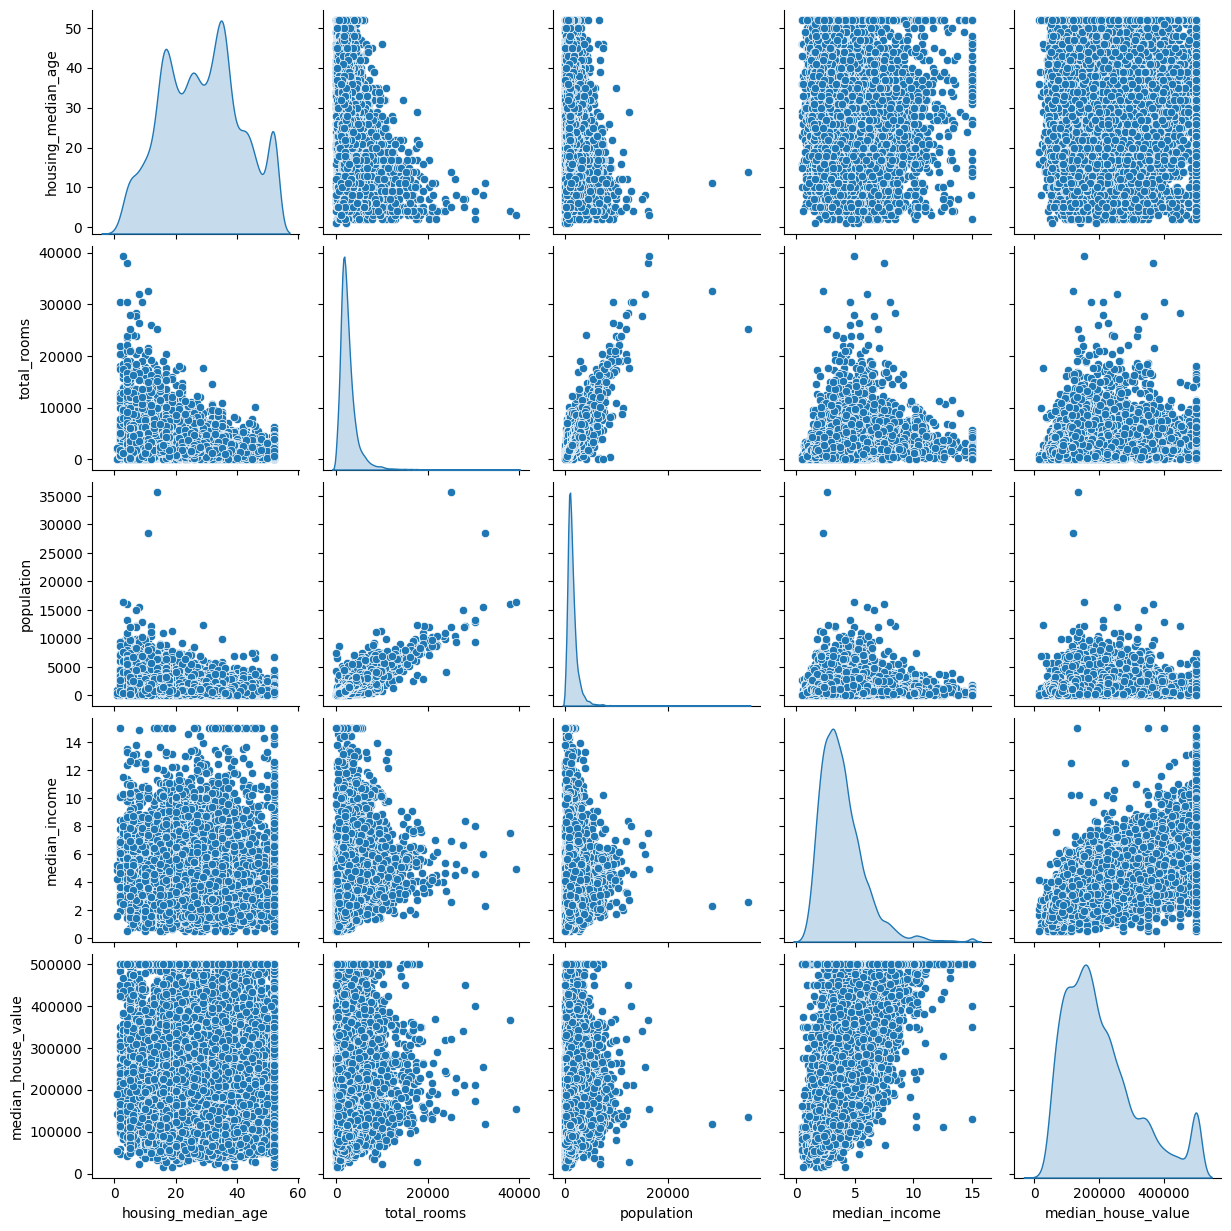

In [ ]:
# pairplot
sns.pairplot(data = housing_data.drop(columns = ['latitude', 'longitude', 'ocean_proximity', 'total_bedrooms', 'households']), diag_kind = 'kde')
plt.show()

### Spatial Visualizations

In [ ]:
california = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))   # california map data
gdf = gpd.GeoDataFrame(housing_data,geometry=gpd.points_from_xy(housing_data.longitude,housing_data.latitude), crs = california.crs)  # location of households

In [ ]:
# mapping locations of the households

fmap = folium.Map(location = [gdf.latitude.mean(), gdf.longitude.mean()], zoom_start = 8)   # creating the folium map
for idx, row in gdf.iterrows():
  folium.Marker(location = [row.latitude, row.longitude], radius = 1, color = 'black', fill = 'red').add_to(fmap)     # add the points into the folium map
fmap

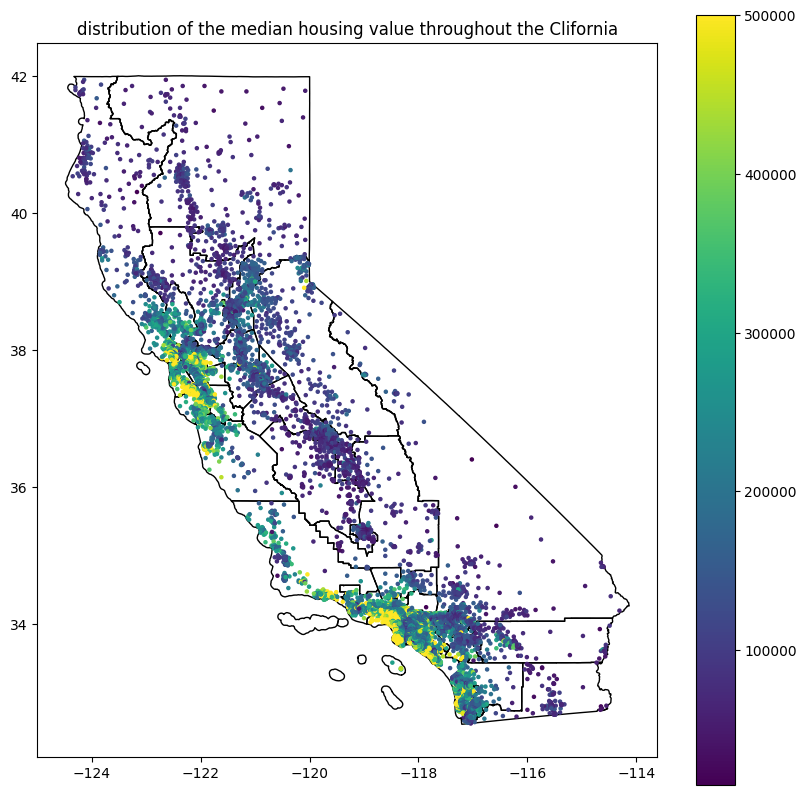

In [ ]:
# distribution of the median housing value throughout the state

ax = california.plot(figsize=(10,10), edgecolor='black', color='none')  # polygons
gdf.plot(ax=ax, column = 'median_house_value', cmap='viridis', markersize=5, legend = True)
plt.title('distribution of the median housing value throughout the Clifornia')
plt.show()


The map shows that the distribution of median housing values is not uniform across the region. The median housing value get higher near the costal areas and in major population centers.

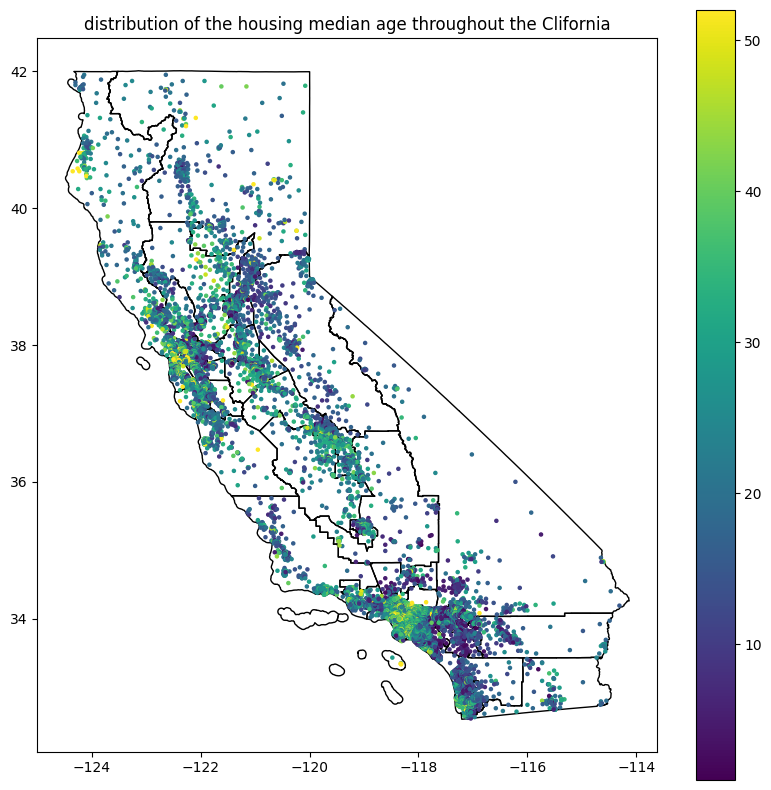

In [ ]:
# distribution of the housing median age throughout the state

ax = california.plot(figsize=(10,10), edgecolor='black', color='none')  # polygons
gdf.plot(ax=ax, column = 'housing_median_age', cmap='viridis', markersize=5, legend = True)
plt.title('distribution of the housing median age throughout the Clifornia')
plt.show()

The map of median housing age shows that the older houses are clustered in major population centers.

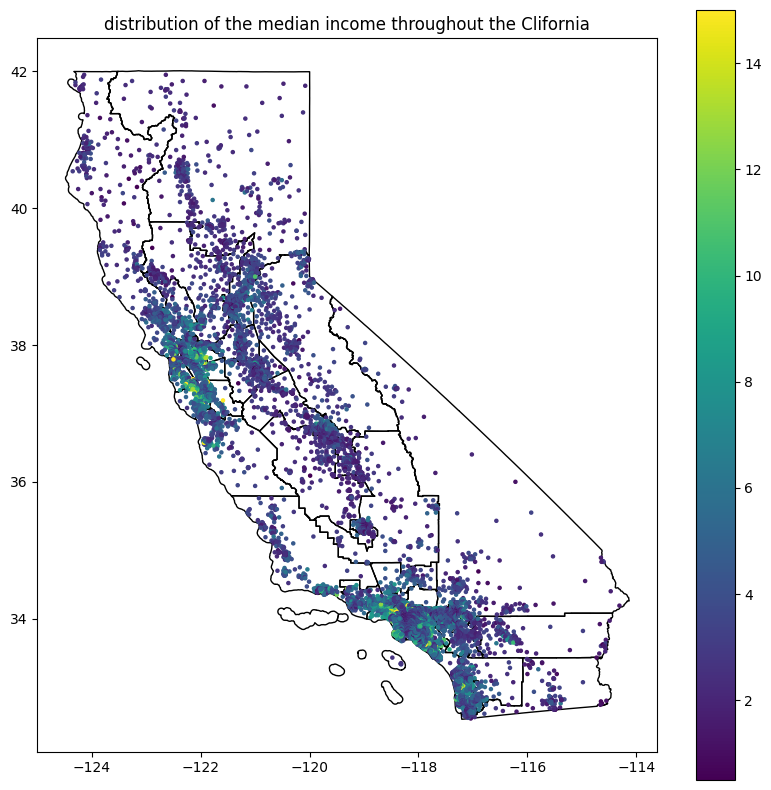

In [ ]:
# distribution of the median income throughout the state

ax = california.plot(figsize=(10,10), edgecolor='black', color='none')  # polygons
gdf.plot(ax=ax, column = 'median_income', cmap='viridis', markersize=5, legend = True)
plt.title('distribution of the median income throughout the Clifornia')
plt.show()

The map of median household income shows a clear spatial pattern across California. Higher median incomes are concentrated in urban and coastal regions, reflecting areas with strong economic activity and high housing costs. Lower median incomes appear more frequently in inland or rural regions.